c:\Users\joaom\AppData\Local\Continuum\anaconda3\envs\pfe\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\joaom\AppData\Local\Temp\ipykernel_26452\768952535.py:104: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


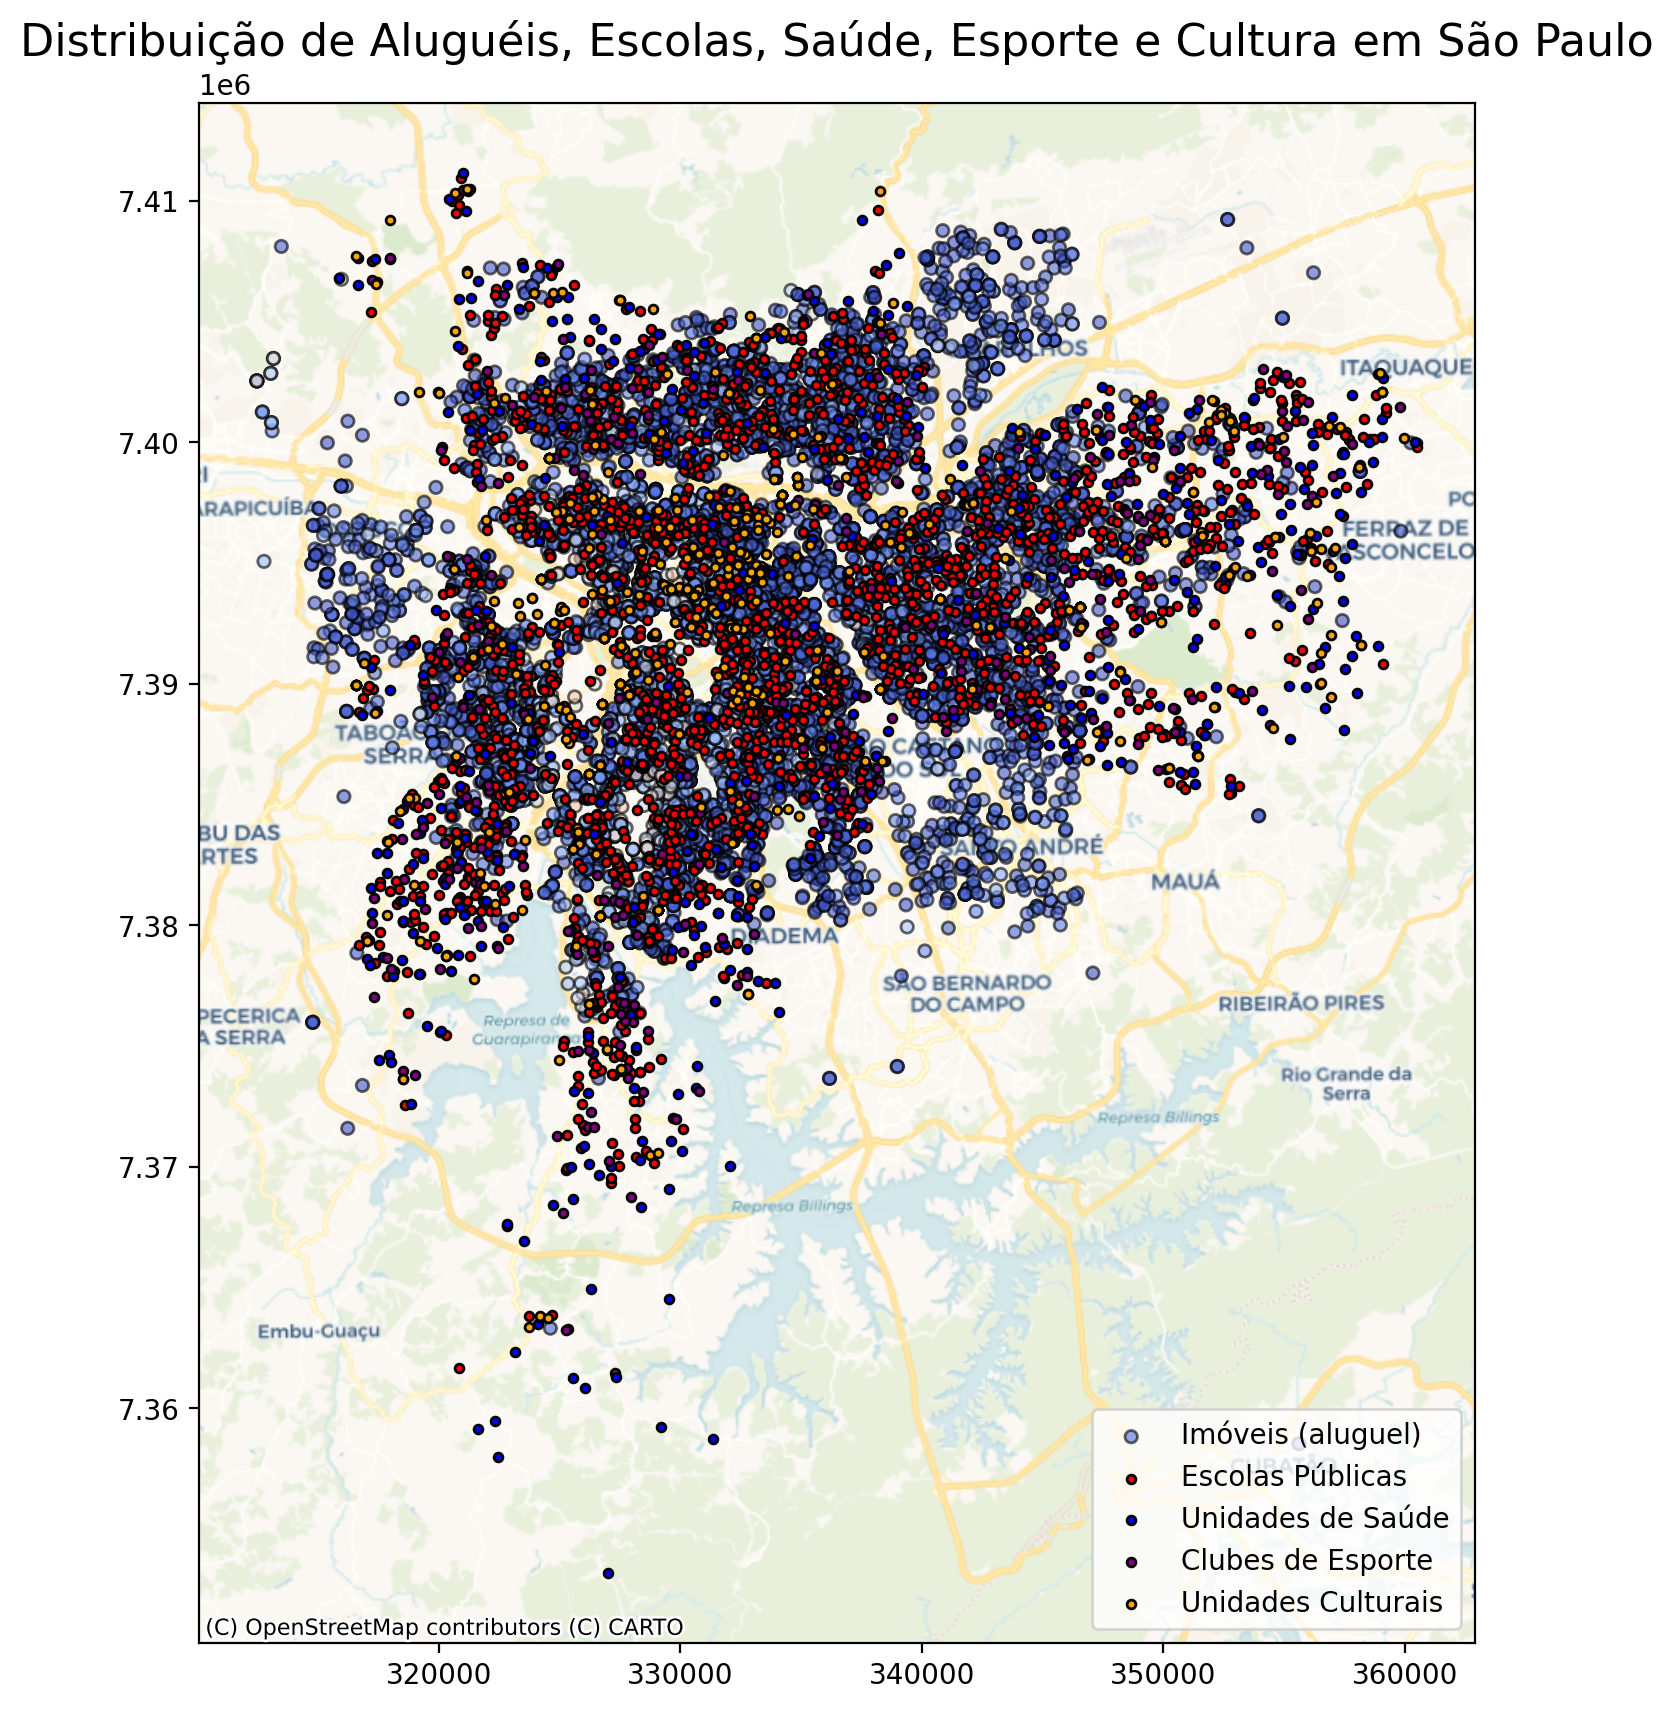

In [21]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

# Carregar os dados dos imóveis
housing_data = pd.read_csv('data/filtered_addresses_sao_paulo.csv')

# Criar a geometria dos imóveis a partir das coordenadas de latitude e longitude
geometry = [Point(xy) for xy in zip(housing_data['longitude'], housing_data['latitude'])]
geo_housing_data = gpd.GeoDataFrame(housing_data, geometry=geometry, crs="EPSG:4326")

# Carregar o limite do município de São Paulo
municipios_sp = gpd.read_file('data/sao_paulo_boundaries/SIRGAS_limites_municipais.shp')
sp = municipios_sp.query('municipio == "SÃO PAULO"')

# Definir o CRS original de sp para SIRGAS 2000 e reprojetar para EPSG:31983
sp.set_crs("EPSG:4674", inplace=True)
sp = sp.to_crs(epsg=31983)

# Reprojetar o GeoDataFrame dos imóveis para EPSG:31983
geo_housing_data = geo_housing_data.to_crs(epsg=31983)

# Carregar o shapefile de escolas públicas, definir o CRS e reprojetar para EPSG:31983
ensino_publico = gpd.read_file('data/education/SIRGAS_SHP_TEMA_EDUCACAO_REDE_PRIVADA.shp')
ensino_publico.set_crs("EPSG:31983", inplace=True)  # Definir o CRS de origem
ensino_publico = ensino_publico.to_crs(epsg=31983)  # Reprojetar para EPSG:31983

# Carregar o shapefile de saúde, definir o CRS e reprojetar para EPSG:31983
saude = gpd.read_file('data/health/SIRGAS_SHP_TEMA_SAUDE_UBS_POSTO_DE_SAUDE_CENTRO_DE_SAUDE.shp')
saude.set_crs("EPSG:31983", inplace=True)
saude = saude.to_crs(epsg=31983)

# Carregar o shapefile de esporte, definir o CRS e reprojetar para EPSG:31983
sport = gpd.read_file('data/sports/SIRGAS_SHP_TEMA_ESPORTE_CLUBE DA COMUNIDADE.shp')
sport.set_crs("EPSG:31983", inplace=True)
sport = sport.to_crs(epsg=31983)

# Carregar o shapefile de cultura, definir o CRS e reprojetar para EPSG:31983
cultura = gpd.read_file('data/culture/SIRGAS_SHP_TEMA_CULTURA.shp')
cultura.set_crs("EPSG:31983", inplace=True)
cultura = cultura.to_crs(epsg=31983)

# Plotar o limite de São Paulo, os imóveis, escolas, saúde, esportes e cultura em um só gráfico
%config InlineBackend.figure_format = 'retina'
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o limite do município de São Paulo
sp.plot(ax=ax, color='white', edgecolor='black', alpha=0.6, label="Limite de São Paulo")

# Plotar os pontos dos imóveis
geo_housing_data.plot(
    ax=ax,
    column='rent',  # Coluna com o valor do aluguel
    cmap='coolwarm',  # Mapa de cores para representar o valor do aluguel
    markersize=20,
    alpha=0.6,
    edgecolor='black',
    label="Imóveis (aluguel)"
)

# Plotar as escolas públicas
ensino_publico.plot(
    ax=ax,
    color='red',  # Cor para diferenciar as escolas
    markersize=10,
    edgecolor='black',
    label="Escolas Públicas"
)

# Plotar as unidades de saúde
saude.plot(
    ax=ax,
    color='blue',  # Cor para diferenciar unidades de saúde
    markersize=10,
    edgecolor='black',
    label="Unidades de Saúde"
)

# Plotar os clubes de esporte
sport.plot(
    ax=ax,
    color='purple',  # Cor para diferenciar clubes de esporte
    markersize=10,
    edgecolor='black',
    label="Clubes de Esporte"
)

# Plotar as unidades culturais
cultura.plot(
    ax=ax,
    color='orange',  # Cor para diferenciar unidades culturais
    markersize=10,
    edgecolor='black',
    label="Unidades Culturais"
)

# Adicionar o mapa base
ctx.add_basemap(ax, crs="EPSG:31983", source=ctx.providers.CartoDB.Voyager)

# Ajustes finais no gráfico
plt.title("Distribuição de Aluguéis, Escolas, Saúde, Esporte e Cultura em São Paulo", fontsize=16)
plt.legend()
plt.show()


In [2]:
import pandas as pd

# Load the housing data
housing_data = pd.read_csv('data/final_housing_analysis.csv')

# Calculate correlation coefficients between rent and distances to various services
correlation_schools = housing_data['rent'].corr(housing_data['distance_to_schools'])
correlation_hospitals = housing_data['rent'].corr(housing_data['distance_to_hospitals'])
correlation_parks = housing_data['rent'].corr(housing_data['distance_to_parks'])

# Display the results
print(f"Correlation between Rent and Distance to Schools: {correlation_schools:.2f}")
print(f"Correlation between Rent and Distance to Hospitals: {correlation_hospitals:.2f}")
print(f"Correlation between Rent and Distance to Parks: {correlation_parks:.2f}")

# Combine correlations into an average metric
average_correlation = (abs(correlation_schools) + abs(correlation_hospitals) + abs(correlation_parks)) / 3
print(f"Average Correlation Coefficient between Rent and Services: {average_correlation:.2f}")

Correlation between Rent and Distance to Schools: -0.06
Correlation between Rent and Distance to Hospitals: -0.05
Correlation between Rent and Distance to Parks: -0.09
Average Correlation Coefficient between Rent and Services: 0.06


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Load data
housing_data = pd.read_csv('data/final_housing_analysis.csv')

# Check the current column names
print("Available columns in the dataset:", housing_data.columns)

# Define the columns we need
required_columns = ['total', 'distance_to_schools', 'distance_to_hospitals', 'distance_to_parks']

# Check if all required columns are in the dataset
if all(column in housing_data.columns for column in required_columns):
    # Step 1: Normalize distances and rent to a 0–1 scale
    scaler = MinMaxScaler()
    
    # Selecting the specific columns for normalization
    normalized_data = scaler.fit_transform(housing_data[required_columns])
    normalized_df = pd.DataFrame(normalized_data, columns=['norm_total', 'norm_distance_to_schools', 
                                                           'norm_distance_to_hospitals', 'norm_distance_to_parks'])

    # Combine normalized columns back into the main DataFrame
    housing_data = pd.concat([housing_data, normalized_df], axis=1)

    # Step 2: Create weighted proximity scores (using inverse distance)
    housing_data['proximity_score'] = (
        (1 - housing_data['norm_distance_to_schools']) * 0.33 + 
        (1 - housing_data['norm_distance_to_hospitals']) * 0.33 + 
        (1 - housing_data['norm_distance_to_parks']) * 0.34
    )

    # Step 3: Calculate the correlation between the proximity score and normalized rent
    proximity_rent_coefficient = housing_data['proximity_score'].corr(housing_data['norm_total'])
    print(f"Composite Proximity-Rent Coefficient: {proximity_rent_coefficient:.2f}")
else:
    missing_columns = [col for col in required_columns if col not in housing_data.columns]
    print(f"Error: Missing required columns in the dataset: {missing_columns}")


Available columns in the dataset: Index(['address', 'district', 'area', 'bedrooms', 'garage', 'type', 'rent',
       'total', 'latitude', 'longitude', 'geometry', 'ID', 'NM_MESO',
       'CD_GEOCODU', 'distance_to_schools', 'distance_to_hospitals',
       'distance_to_parks'],
      dtype='object')
Composite Proximity-Rent Coefficient: 0.08
